## Continuous Anomaly Detection
#### Corey Solitaire
`11-03-2020`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Import Lemonade Dataset

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
# explore df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [4]:
# explore df
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


***

#### Split df 

In [5]:
# from sklearn.model_selection import train_test_split

# def split_df(df):
#     '''
#     This function splits our dataframe in to train, validate, and test
#     '''
#     # split dataset
#     train_validate, test = train_test_split(df, test_size = .2, random_state = 123)
#     train, validate = train_test_split(train_validate, test_size = .3, random_state = 123)
#     return train, validate, test   

# train,validate,test = split_df(df)
# train.shape, validate.shape,test.shape

***

#### Visualize

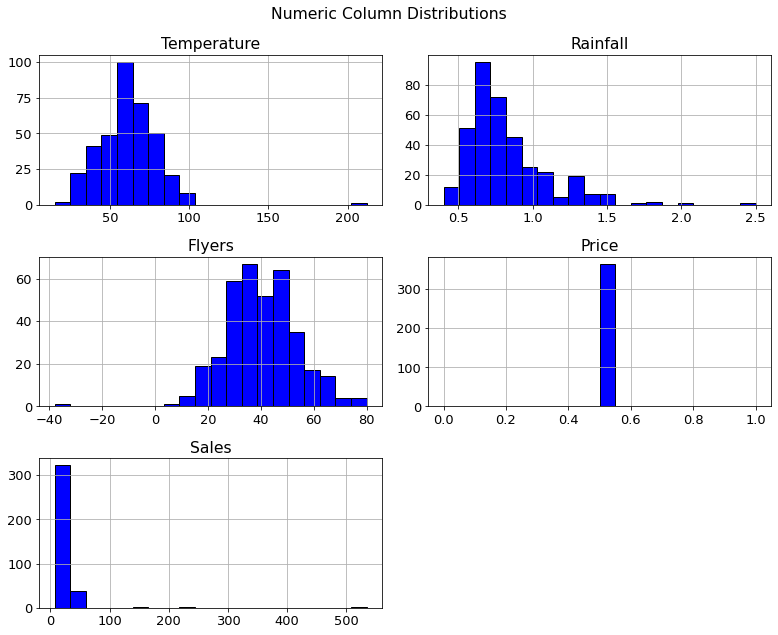

In [6]:
def numeric_hists(df, bins=20):
    """
    Function to take in a DataFrame, bins default 20,
    select only numeric dtypes, and
    display histograms for each numeric column
    """
    plt.rc('figure', figsize=(11, 9))
    plt.rc('font', size=13)
    num_df = df.select_dtypes(include=np.number)
    num_df.hist(bins=bins, color='blue', ec='black')
    plt.suptitle('Numeric Column Distributions')
    plt.tight_layout()
    plt.show()
    
numeric_hists(df)

***

**Takeaway:**
`All features appear to be normally distributed.  This means that I could use the IQR or Imperical Rule to explore for outliers.  I will IQR because it works equally well for data regardless of the distribution.`

***

## Exercises:

### 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [7]:

def get_lower_and_upper_bounds(s, k):  
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    lower_bound = q1 - k * iqr
    return upper_bound, lower_bound

get_lower_and_upper_bounds(df.Temperature, k=1.5)

(104.7, 16.700000000000003)

***

**Takeaway:**
`This function will provide the lower and upper bounds for a series in the df.`

***

In [8]:
def get_upper_outliers(s, k):  
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)
    return df

add_upper_outlier_columns(df, k=1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_outliers,Rainfall_outliers,Flyers_outliers,Price_outliers,Sales_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.70,0.0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.03,0.0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.03,0.0,0.0,0.0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.0,0.00,0.0,0.0,0.0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19,0.0,0.00,0.0,0.0,0.0
361,12/28/17,Thursday,37.8,1.25,32,0.5,16,0.0,0.00,0.0,0.0,0.0
362,12/29/17,Friday,39.5,1.25,17,0.5,15,0.0,0.00,0.0,0.0,0.0
363,12/30/17,Saturday,30.9,1.43,22,0.5,13,0.0,0.13,0.0,0.0,0.0


In [9]:
df.shape

(365, 12)

In [10]:
#This text prints information regrding the outlier columns created

add_upper_outlier_columns(df, k=1.5)    
outlier_cols = [col for col in df if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df[col][df[col] > 0]
    print(data.describe())

~~~
Temperature_outliers
count      1.0
mean     107.3
std        NaN
min      107.3
25%      107.3
50%      107.3
75%      107.3
max      107.3
Name: Temperature_outliers, dtype: float64
~~~
Rainfall_outliers
count    28.000000
mean      0.220357
std       0.256594
min       0.030000
25%       0.030000
50%       0.130000
75%       0.240000
max       1.200000
Name: Rainfall_outliers, dtype: float64
~~~
Flyers_outliers
count    2.00000
mean     2.50000
std      2.12132
min      1.00000
25%      1.75000
50%      2.50000
75%      3.25000
max      4.00000
Name: Flyers_outliers, dtype: float64
~~~
Price_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Price_outliers, dtype: float64
~~~
Sales_outliers
count      4.000000
mean     222.500000
std      182.180314
min       98.000000
25%      109.250000
50%      151.500000
75%      264.750000
max      489.000000
Name: Sales_outliers, dtype: float64
~~~
Temperature_outliers_out

In [11]:
# This function deletes the added columns
df = df[df.columns.drop(list(df.filter(regex='_outliers')))]
df.shape

(365, 7)

***

**Takeaway:**
`This function uses the bounds to create columns that can be used to sort/filter data.`

***

### 2. Using lemonade.csv dataset and focusing on continuous variables:

#### 2a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [12]:
get_lower_and_upper_bounds(df.Temperature, k=1.5)

(104.7, 16.700000000000003)

In [13]:
df[df.Temperature >104.7]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [14]:
df[df.Temperature <16.700000000000003]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


`These bounds only identify 2 observations as anomalous.  I think that different boundries should be used for temperature`

***

In [15]:
get_lower_and_upper_bounds(df.Rainfall, k=1.5)

(1.3, 0.26)

In [16]:
df[df.Rainfall >1.3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


In [17]:
df[df.Rainfall <0.26]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


`These bounds eliminate more observations from the uppper bound than the lower because rainfall is not normally distributed.  We should take the log of the column to normalize it and then run the bound test again.`

***

In [18]:
get_lower_and_upper_bounds(df.Flyers, k=1.5)

(76.0, 4.0)

In [19]:
df[df.Flyers >76]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


In [20]:
df[df.Flyers <4]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


`These bounds only eliminate 3 observation from the datafrme and should be ok`

***

In [21]:
get_lower_and_upper_bounds(df.Sales, k=1.5)

(45.0, 5.0)

In [22]:
df[df.Sales >45]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


In [23]:
df[df.Sales <5]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


`These bounds only eliminate 4 observations from df and it would be fine of they were removed.`

***

#### 2b. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [24]:
get_lower_and_upper_bounds(df.Temperature, k=3)

(137.7, -16.299999999999997)

In [25]:
df[df.Temperature >137.7]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [26]:
df[df.Temperature <-16.299999999999997]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


`These bounds do not make sense as they are too exclusive`

***

In [27]:
get_lower_and_upper_bounds(df.Rainfall, k=3)

(1.69, -0.13)

In [28]:
df[df.Rainfall >1.69]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [29]:
df[df.Rainfall <-0.13]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


`These bounds do not make sense as they are too exclusive`

***

In [30]:
get_lower_and_upper_bounds(df.Flyers, k=3)

(103.0, -23.0)

In [31]:
df[df.Flyers >103.0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [32]:
df[df.Flyers <-23.0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


`These bounds do not make sense as they are too exclusive`

***

In [33]:
get_lower_and_upper_bounds(df.Sales, k=3)

(60.0, -10.0)

In [34]:
df[df.Sales >60.0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


In [35]:
df[df.Sales <-10.0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


`These bounds do not make sense as they are too exclusive`

***

### 3. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns: 

#### Use a 2 sigma decision rule to isolate the outliers.   

    - Do these make sense?   
    
    - Should certain outliers be kept or removed?   


***

`Temperature, Flyers and Sales are Normally Distributed`

***

In [36]:
df =df[['Temperature', 'Flyers', 'Sales']]

In [37]:
def sigma_outliers(df_col, sigma = 2):
    # Calculate z-score
    zscore =abs((df_col).mean()) / (df_col.std())
    # Calculate upper bound
    upper_bound = (zscore * sigma) + df_col.mean()
    # Calculate lower bound
    lower_bound = df_col.mean() - (zscore * sigma) 
    return upper_bound, lower_bound

In [38]:
for col in df:
    print(col)
    upper_bound, lower_bound = sigma_outliers(df[col])
    print('lower bound:', lower_bound)
    print('upper bound:', upper_bound,"\n")

Temperature
lower bound: 54.45422492031442
upper bound: 67.99509014817882 

Flyers
lower bound: 34.286205005901834
upper bound: 45.922014172180354 

Sales
lower bound: 26.064949845456848
upper bound: 29.66655700385822 



#### Emperical Rule

In [39]:
# Define zscore for Temp

x = df.Temperature
zscores = (x - x.mean()) / x.std()
temp = pd.DataFrame()
temp["x"] = x
temp["zscore"] = abs(zscores)

# Outliers greater then 2 sd (2 Sigma)

temp[zscores >= 2]

,x,zscore
41,212.0,8.336627
166,99.3,2.105251
176,102.6,2.287714
181,102.9,2.304301
190,98.0,2.033372
198,99.3,2.105251
202,99.6,2.121838
207,97.9,2.027843


In [40]:
temp[zscores <= -2]

,x,zscore
338,22.0,2.168799
364,15.1,2.550311


In [41]:
# Define zscore for Flyers

x = df.Flyers
zscores = (x - x.mean()) / x.std()
fly = pd.DataFrame()
fly["x"] = x
fly["zscore"] = abs(zscores)

# Outliers greater then 2 sd (2 Sigma)

fly[zscores >= 2]

,x,zscore
166,77,2.676244
170,70,2.168499
171,76,2.603709
182,68,2.023429
183,68,2.023429
194,80,2.893849
198,76,2.603709
203,72,2.313569
204,69,2.095964
207,74,2.458639


In [42]:
fly[zscores <= -2]

,x,zscore
324,-38,5.665283
338,11,2.111067
364,9,2.256137


In [43]:
# Define zscore for Sales

x = df.Sales
zscores = (x - x.mean()) / x.std()
sale = pd.DataFrame()
sale["x"] = x
sale["zscore"] = abs(zscores)

# Outliers greater then 2 sd (2 Sigma)

sale[zscores >= 2]

,x,zscore
181,143,3.720233
182,158,4.204914
183,235,6.692948
184,534,16.354275


In [44]:
sale[zscores <= -2]

,x,zscore


***

`Assuming the data is normally distributed, and represents 95% of all observations, 2 sigma would be a good fence for lemonade sale outliers`

***

### 4. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [45]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"
df = pd.read_csv(url)
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [46]:
df = df[['Temperature','Flyers', 'Sales']]
df.shape

(365, 3)

In [47]:
def sigma_outliers(df_col, sigma = 3):
    # Calculate z-score
    zscore =abs((df_col).mean()) / (df_col.std())
    # Calculate upper bound
    upper_bound = (zscore * sigma) + df_col.mean()
    # Calculate lower bound
    lower_bound = df_col.mean() - (zscore * sigma) 
    return upper_bound, lower_bound

In [48]:
for col in df:
    print(col)
    upper_bound, lower_bound = sigma_outliers(df[col])
    print('lower bound:', lower_bound)
    print('upper bound:', upper_bound,"\n")

Temperature
lower bound: 51.069008613348316
upper bound: 71.38030645514492 

Flyers
lower bound: 31.377252714332208
upper bound: 48.83096646374998 

Sales
lower bound: 25.164548055856507
upper bound: 30.56695879345856 



In [49]:
# Define zscore for Temp

x = df.Temperature
zscores = (x - x.mean()) / x.std()
temp = pd.DataFrame()
temp["x"] = x
temp["zscore"] = abs(zscores)

# Outliers greater then 3 sd (3 Sigma)

temp[zscores >= 3]

,x,zscore
41,212.0,8.336627


In [50]:
temp[zscores <= -3]

,x,zscore


In [51]:
# Define zscore for Flyers

x = df.Flyers
zscores = (x - x.mean()) / x.std()
fly = pd.DataFrame()
fly["x"] = x
fly["zscore"] = abs(zscores)

# Outliers greater then 3 sd (3 Sigma)

fly[zscores >= 3]

,x,zscore


In [52]:
fly[zscores <= -3]

,x,zscore
324,-38,5.665283


In [53]:
# Define zscore for Sales

x = df.Sales
zscores = (x - x.mean()) / x.std()
sale = pd.DataFrame()
sale["x"] = x
sale["zscore"] = abs(zscores)

# Outliers greater then 3 sd (3 Sigma)

sale[zscores >= 3]

,x,zscore
181,143,3.720233
182,158,4.204914
183,235,6.692948
184,534,16.354275


In [54]:
sale[zscores <= -3]

,x,zscore


***

`Assuming the data is normally distributed, and represents 99.7% of all observations, 3 sigma would be a good fence for lemonade sale outliers.  It appers that very few values fall outside of this window`

***